# UNAD
## Luis Alberto Salcedo Salas

### Dataset Regresión Logística – Heart Disease Cleveland UCI

__Pasos de la actividad__
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
1. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
1. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
1. Dividir el dataset en Train y Test para evaluar correctamente el modelo
1. Entrenar el modelo configurando los diferentes hiperparámetros
1. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
1. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
1. Interpretar, analizar y documentar los resultados obtenidos

# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [53]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, classification_report

In [13]:
# lectura de datos en Python y lo cargamos en la variable Datos

Data = pd.read_csv('D:/Documentos/Universidad. Ing Sistemas/10 - Semestre/Análisis de datos/Tarea 3/heart_cleveland_upload.csv')

In [15]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [23]:
# Descripción de los datos

Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [28]:
# Verificación de datos atípicos
# En el describe anterior se registra en cada columna 297 registros por lo cual no existen datos vacíos

print("Valores 0-1 (rango de valores) en sex: ", Data['sex'].isin([0, 1]).sum())
print("Valores 0-3 (rango de valores) en cp: ", Data['cp'].isin([0, 1, 2, 3]).sum())
print("Valores de cero (No posible) en trestbps: ", Data['trestbps'].isin([0]).sum())
print("Valores 0-1 (rango de valores) en fbs: ", Data['fbs'].isin([0, 1]).sum())
print("Valores 0-2 (rango de valores) en restecg: ", Data['restecg'].isin([0, 1, 2]).sum())
print("Valores 0-1 (rango de valores) en exang: ", Data['exang'].isin([0, 1]).sum())
print("Valores 0-2 (rango de valores) en slope: ", Data['slope'].isin([0, 1, 2]).sum())
print("Valores 0-3 (rango de valores) en ca: ", Data['ca'].isin([0, 1, 2, 3]).sum())
print("Valores 0-2 (rango de valores) en thal: ", Data['thal'].isin([0, 1, 2]).sum())
print("Valores 0-1 (rango de valores) en condition: ", Data['condition'].isin([0, 1]).sum())

Valores 0-1 (rango de valores) en sex:  297
Valores 0-3 (rango de valores) en cp:  297
Valores de cero (No posible) en trestbps:  0
Valores 0-1 (rango de valores) en fbs:  297
Valores 0-2 (rango de valores) en restecg:  297
Valores 0-1 (rango de valores) en exang:  297
Valores 0-2 (rango de valores) en slope:  297
Valores 0-3 (rango de valores) en ca:  297
Valores 0-2 (rango de valores) en thal:  297
Valores 0-1 (rango de valores) en condition:  297


Text(0.5, 1.0, 'IBox Plot Age')

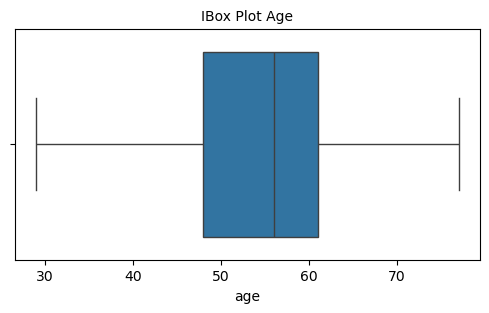

In [29]:
# Realización de gráficos age

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['age'])
plt.title('IBox Plot Age', fontsize=10 )

Text(0.5, 1.0, 'IBox Plot trestbps')

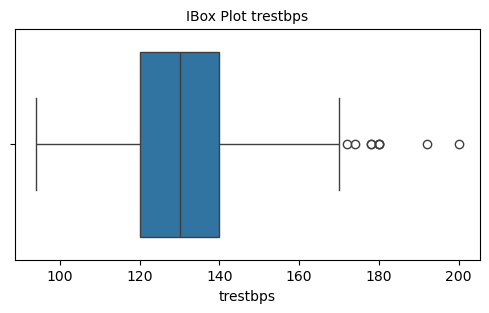

In [30]:
# Realización de gráficos trestbps

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['trestbps'])
plt.title('IBox Plot trestbps', fontsize=10 )

Text(0.5, 1.0, 'IBox Plot chol')

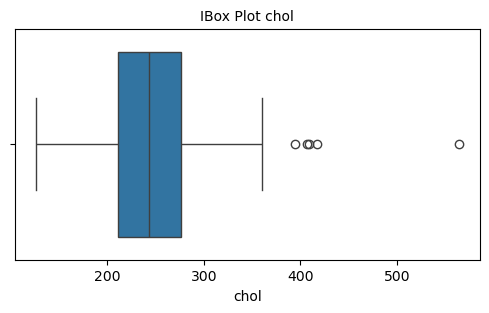

In [31]:
# Realización de gráficos chol

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['chol'])
plt.title('IBox Plot chol', fontsize=10 )

Text(0.5, 1.0, 'IBox Plot thalach')

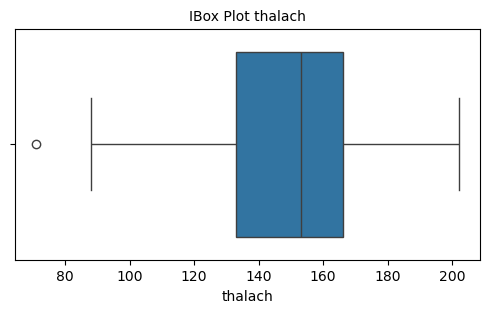

In [32]:
# Realización de gráficos thalach

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['thalach'])
plt.title('IBox Plot thalach', fontsize=10 )

Se identifican valores fuera de rangos normales en trestbps (presión sanguínea en reposo), chol (colesterol) y thalach (máximo ritmo cardíaco), sin embargo, después de una pequeña investigación son valores posibles por lo cual se opta no afectarlos

# Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [33]:
# Conteo e identificación de pacientes que padecen de enfermedades cardiacas

Data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

# Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [41]:
# Separar variable dependiente (CONDITION) de las variables independientes

X = Data.drop(columns=['condition'])
Y = Data['condition']

# Realizar separación de datos TRAIN (75%) y datos TEST (25%) utilizando sklearn

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

# Entrenar el modelo configurando los diferentes hiperparámetros

In [43]:
# Crear modelo de regresión logística

regLog_model = LogisticRegression(solver = "liblinear")

# Ingresar datos para entrenar el modelo

regLog_model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [59]:
# Predicción del modelo

prediction = regLog_model.predict(X_test)

# accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
classReport = classification_report(Y_test, prediction)

# Muestra de resultados

print("Accuracy: ", accuracy)
print("Precisión: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)
print(classReport)

Accuracy:  0.88
Precisión:  0.8823529411764706
Recall:  0.8571428571428571
F1 score:  0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

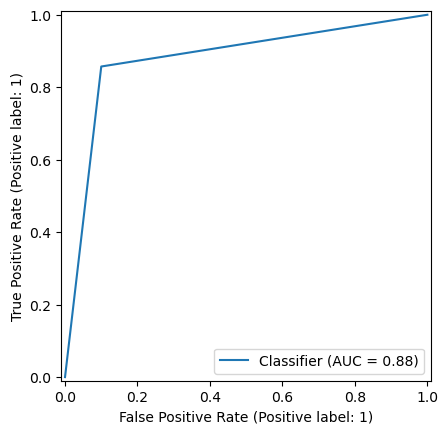

In [52]:
# ROC

RocCurveDisplay.from_predictions(Y_test, prediction)
plt.show()

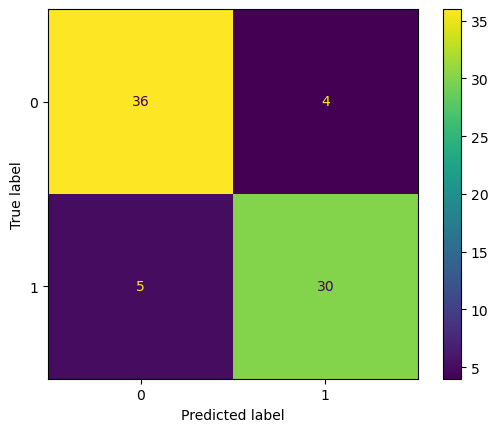

In [54]:
# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(Y_test, prediction)
plt.show()

# Interpretar, analizar y documentar los resultados obtenidos

Con los resultados de _accuracy_ nos indica que el modelo de regresión logística predijo correctamente en un 88% de los escenarios, lo cual también está soportado por la _tabla ROC_ y el valor de _AUC_.

Adicional a ello los resultados de _precision_ y _recall_ nos justifica el resultado de _accuracy_ dando confiabilidad en la predicción de TP con respecto a FN y FP con altos valores de 88% y el 85% respectivamente que en conjunto nos brindan un _F1 score_ del 86%.